# Tools

In [1]:
from matplotlib import pyplot as plt
import numpy as np, os, glob

In [2]:
%matplotlib inline

# Model

In [7]:
from bem import matter, xscalc, xtaloriprobmodel as xopm, peak_profile as pp, calc

In [4]:
# create material
atoms = [matter.Atom('Ni', (0,0,0)), matter.Atom('Ni', (0.5, 0.5, 0)),
         matter.Atom('Ni', (0.5,0,0.5)), matter.Atom('Ni', (0, 0.5, 0.5))]
a=3.5238
alpha = 90.
lattice = matter.Lattice(a=a, b=a, c=a, alpha=alpha, beta=alpha, gamma=alpha)
fccNi = matter.Structure(atoms, lattice, sgid=225)

In [5]:
# define parameters
wavelengths = np.arange(0.05, 5.5, 0.001)
T = 300

In [6]:
xs_calc = xscalc.XSCalculator(fccNi, T)

In [8]:
jorgensen = pp.Jorgensen(alpha=[50, 0.], beta=[10, 0], sigma=[0, .003, 0])                                                                           

# Compute spectra

In [9]:
spectrum_calculator = calc.BraggEdgeSpectrumCalculator(xs_calc, jorgensen)

In [11]:
spectrum = spectrum_calculator('total', wavelengths)

In [12]:
xs = xs_calc.xs(wavelengths)

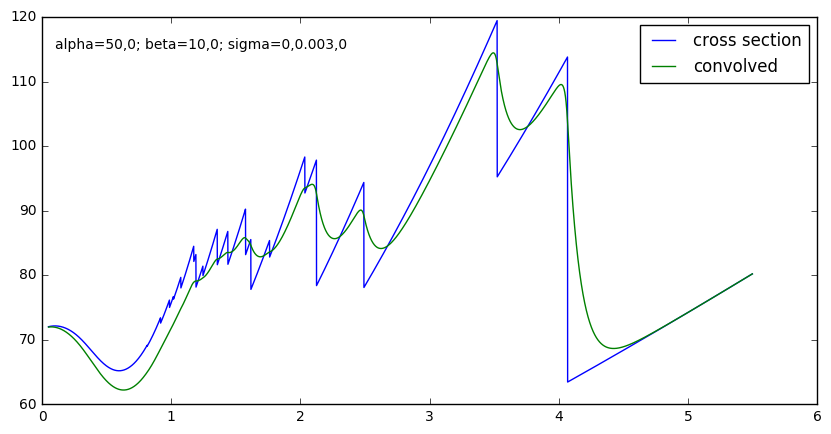

In [16]:
plt.figure(figsize=(10,5))
plt.plot(wavelengths, xs, label='cross section')
plt.plot(wavelengths, spectrum, label='convolved')
plt.legend()
plt.text(0.1, 115, "alpha=50,0; beta=10,0; sigma=0,0.003,0")